In [2]:
import os

In [24]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

In [25]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['Im002_1.tif', 'Im003_1.tif', 'Im004_1.tif', 'Im005_1.tif', 'Im006_1.tif', 'Im007_1.tif', 'Im008_1.tif', 'Im009_1.tif', 'Im010_1.tif', 'Im011_1.tif']
['Im132_0.tif', 'Im133_0.tif', 'Im134_0.tif', 'Im135_0.tif', 'Im136_0.tif', 'Im137_0.tif', 'Im138_0.tif', 'Im139_0.tif', 'Im140_0.tif', 'Im141_0.tif']
['Im101_1.tif', 'Im102_1.tif', 'Im103_1.tif', 'Im104_1.tif', 'Im105_1.tif', 'Im106_1.tif', 'Im107_1.tif', 'Im108_1.tif', 'Im109_1.tif', 'Im110_1.tif']
['Im231_0.tif', 'Im232_0.tif', 'Im233_0.tif', 'Im234_0.tif', 'Im235_0.tif', 'Im236_0.tif', 'Im237_0.tif', 'Im238_0.tif', 'Im239_0.tif', 'Im240_0.tif']


In [26]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 99
total training human images: 99
total validation horse images: 30
total validation human images: 30


In [27]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

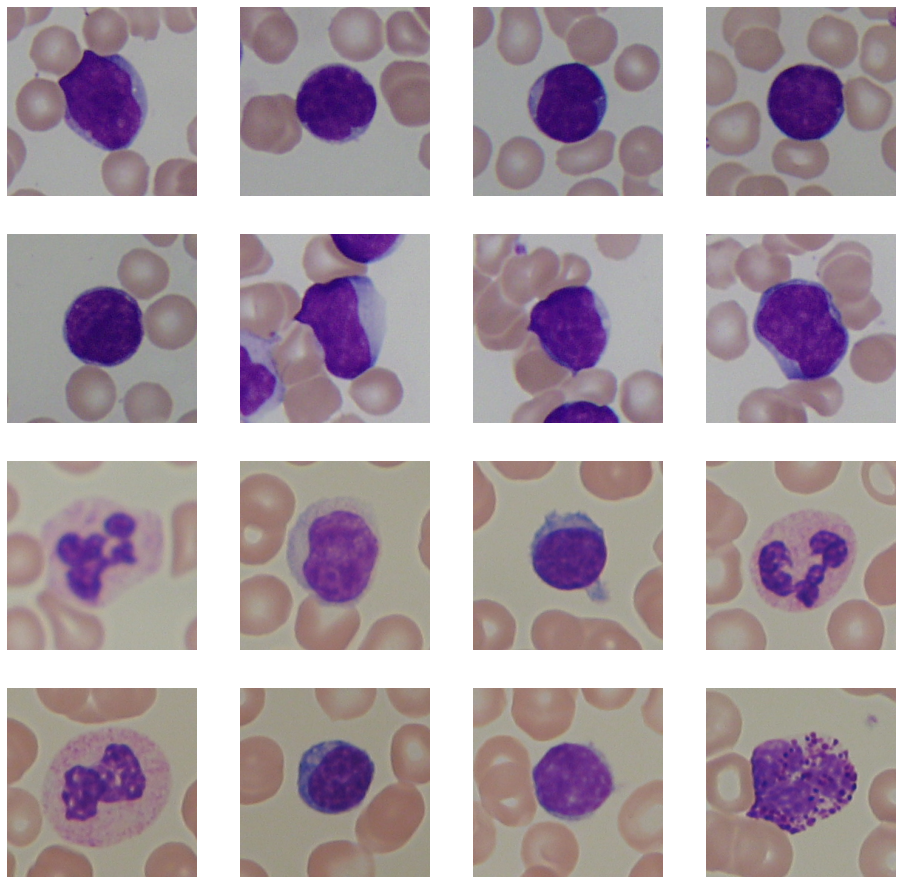

In [28]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [29]:
import tensorflow as tf

In [30]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(257, 257, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 255, 255, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)       

In [32]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(257, 257),  # All images will be resized to 300x300
        batch_size=9,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './validation-horse-or-human/',  # This is the source directory for training images
        target_size=(257, 257),  # All images will be resized to 300x300
        batch_size=3,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 198 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [34]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 2s 216ms/step - loss: 0.8099 - accuracy: 0.6364 - val_loss: 0.6796 - val_accuracy: 0.5417
Epoch 2/15
8/8 [==============================] - 2s 196ms/step - loss: 0.7180 - accuracy: 0.4605 - val_loss: 0.7107 - val_accuracy: 0.3750
Epoch 3/15
8/8 [==============================] - 2s 198ms/step - loss: 0.7022 - accuracy: 0.6639 - val_loss: 0.6805 - val_accuracy: 0.5417
Epoch 4/15
8/8 [==============================] - 2s 196ms/step - loss: 0.6798 - accuracy: 0.6204 - val_loss: 0.6958 - val_accuracy: 0.5417
Epoch 5/15
8/8 [==============================] - 2s 200ms/step - loss: 0.6762 - accuracy: 0.5706 - val_loss: 0.7021 - val_accuracy: 0.3333
Epoch 6/15
8/8 [==============================] - 2s 194ms/step - loss: 0.6492 - accuracy: 0.6668 - val_loss: 0.7231 - val_accuracy: 0.5833
Epoch 7/15
8/8 [==============================] - 2s 197ms/step - loss: 0.6078 - accuracy: 0.5609 - val_loss: 0.7160 - val_accuracy: 0.5000
Epoch 8/15
8/8 [====

In [36]:
import numpy as np
#from google.colab import files
from keras.preprocessing import image

#uploaded = files.upload()
print("======")
#print(uploaded)
print("======")
upload_local = './predict/Im001_1.tif'

#for fn in uploaded.keys():
def predict(path):
  # predicting images
  #path = '/content/' + fn
  img = image.load_img(path, target_size=(257, 257))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(" is a human")
  else:
    print(" is a horse")
    
predict(upload_local)

[0.]
 is a horse


c:\users\mahatma ageng wisesa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


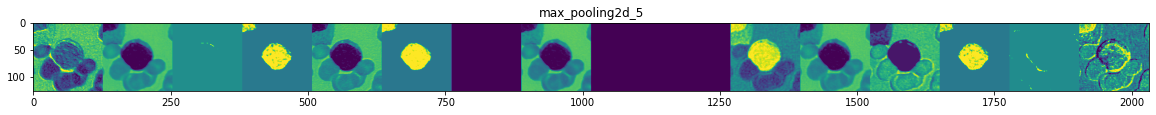

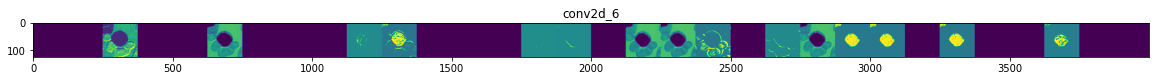

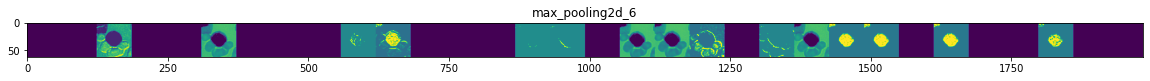

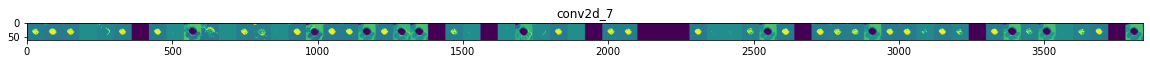

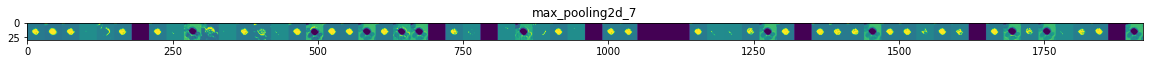

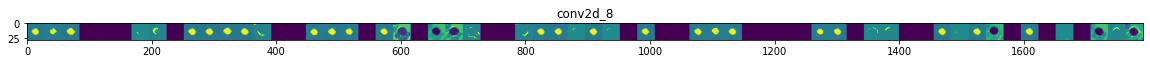

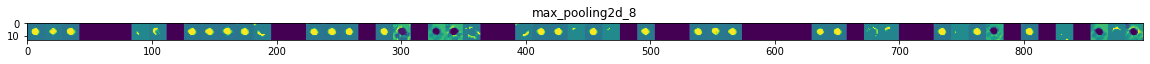

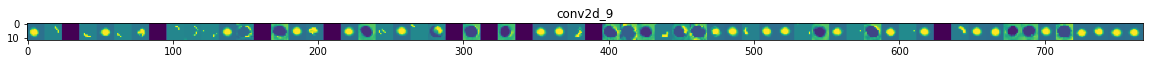

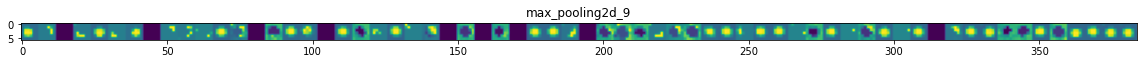

In [38]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(257, 257))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')